In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

# 1. Preprocessing

In [2]:
warnings.simplefilter(action='ignore')  

In [3]:
data=pd.read_csv('E:\cardata.csv')
df1=pd.DataFrame(data)
df1


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df2=df1.drop({'Car_Name'}, axis=1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [5]:
df2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df2.nunique()

Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
df3=df2.copy()
df3.insert(1,'Age', df3.Year.max() - df3.Year)


In [8]:
df3

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,2,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,3,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,9,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,1,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df3.Age.nunique()


16

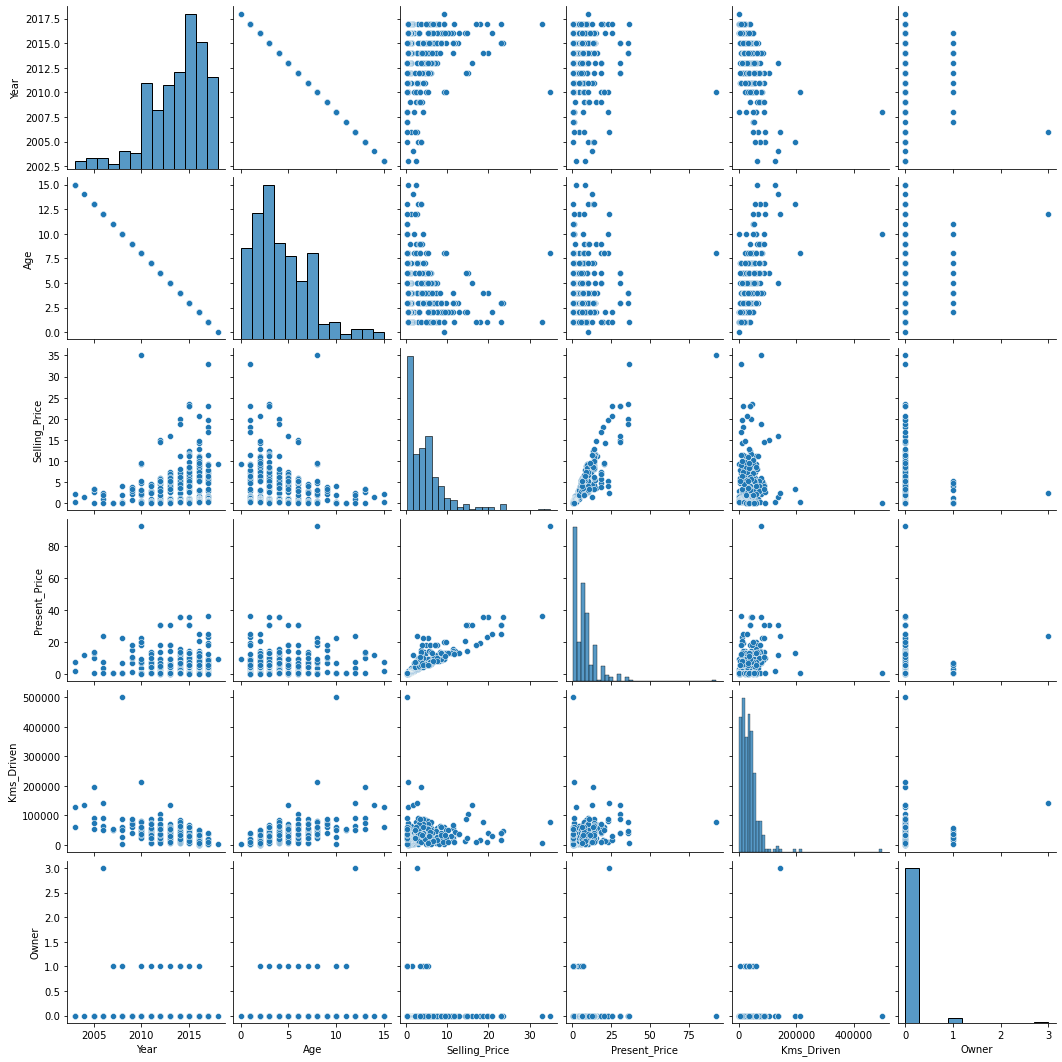

In [10]:
sns.pairplot(df3)
plt.show()

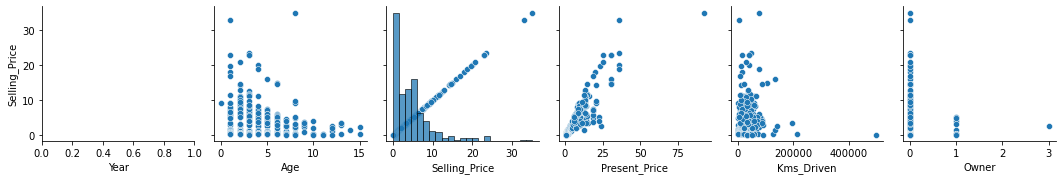

In [11]:
sns.pairplot(df3,y_vars=['Selling_Price'])
plt.show()

In [12]:
df3.corr()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,-1.000000,0.236141,-0.047584,-0.524342,-0.182104
Age,-1.000000,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,0.236141,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,0.182104,-0.088344,0.008057,0.089216,1.000000


In [13]:
df3.describe()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,2.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,4.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,15.000000,35.000000,92.600000,500000.000000,3.000000


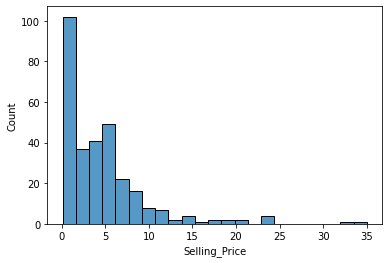

In [14]:
sns.histplot( x = df3.Selling_Price)
plt.show()

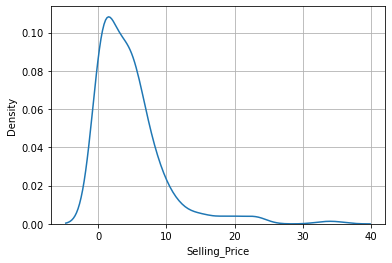

In [15]:
sns.kdeplot(x = df3.Selling_Price)
plt.grid()

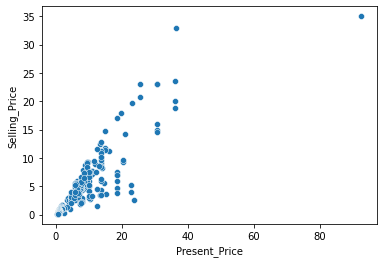

In [16]:
sns.scatterplot( x = df3.Present_Price , y= df3. Selling_Price)
plt.show()

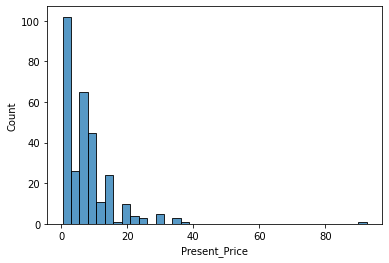

In [17]:
sns.histplot(x = df3.Present_Price)
plt.show()

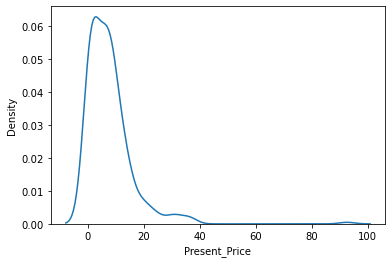

In [18]:
sns.kdeplot(x = df3.Present_Price)
plt.show()

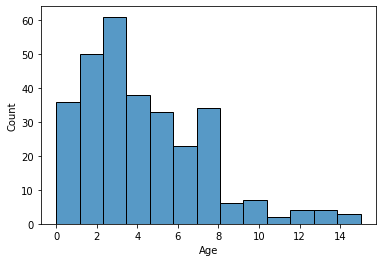

In [19]:
sns.histplot(x=df3.Age)
plt.show()

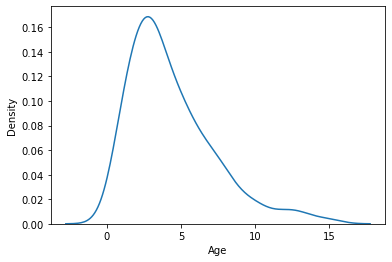

In [20]:
sns.kdeplot(x=df3.Age)
plt.show()


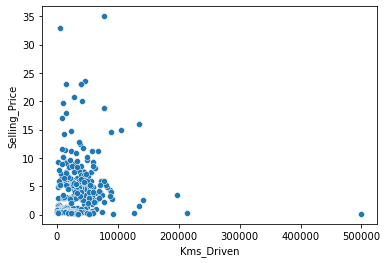

In [21]:
sns. scatterplot (x = df3.Kms_Driven, y = df3.Selling_Price )
plt.show()

<AxesSubplot:xlabel='Kms_Driven', ylabel='Count'>

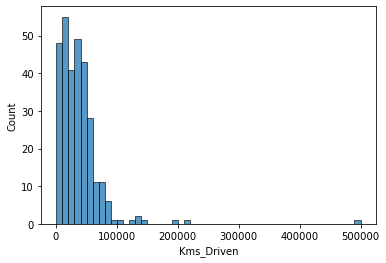

In [22]:
sns.histplot(df3.Kms_Driven)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

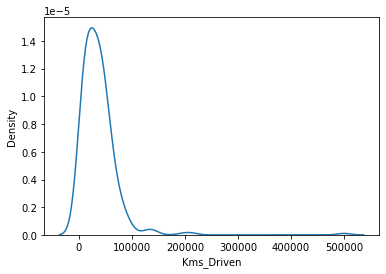

In [23]:
sns.kdeplot(df3.Kms_Driven)



In [24]:
df3.head()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4,4.60,6.87,42450,Diesel,Dealer,Manual,0


# the Year is dropped (multicolinearity)

In [25]:
df3.drop(columns ='Year', inplace = True)
df3

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,3,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,9,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,1,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
sns.color_palette('Set2',3)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549)]

<AxesSubplot:xlabel='Age', ylabel='count'>

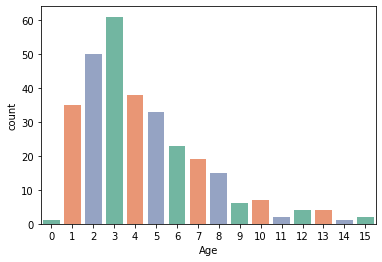

In [27]:
sns.countplot(x = df3.Age, palette = sns.color_palette('Set2',3))

# categorical

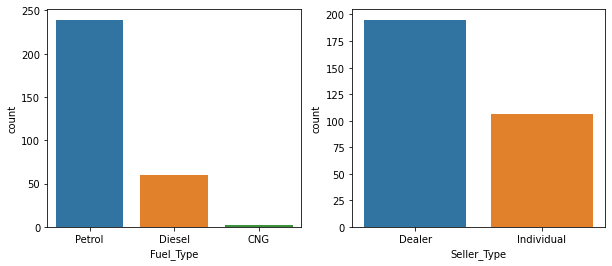

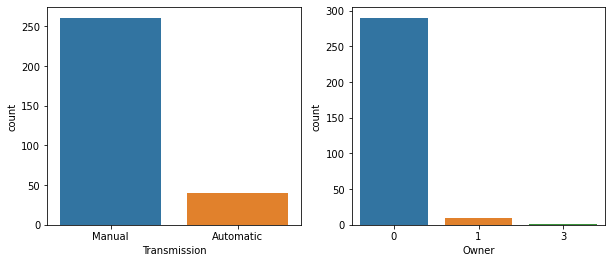

In [28]:
categorical = ['Fuel_Type','Seller_Type','Transmission','Owner']
i=0
while i < 4 :
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.countplot(data=df3, x = categorical[i])
    i +=1
    plt.subplot(122)
    sns.countplot(data=df3,x = categorical [i])
    i +=1
    plt.show()

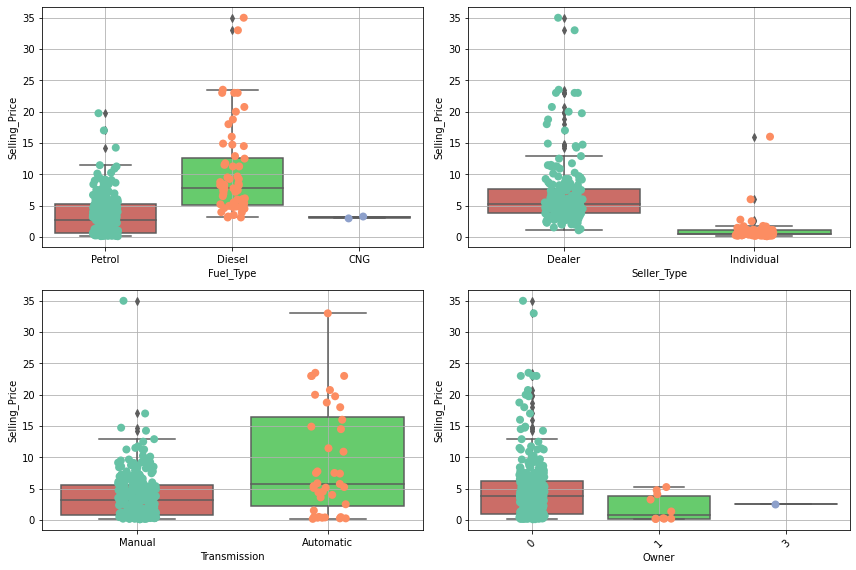

In [29]:
plt.figure(figsize = (12,8))
for i, colName in enumerate("Fuel_Type	Seller_Type	Transmission	Owner".split("	")):
    plt.subplot(2,2, i + 1)
    sns.boxplot(x = df3[colName], y = df3.Selling_Price, palette = sns.color_palette("hls", 3))
    sns.stripplot(x = df3[colName], y = df3.Selling_Price, palette = sns.color_palette("Set2", 3), s = 8)
    plt.grid()
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

# Numerical

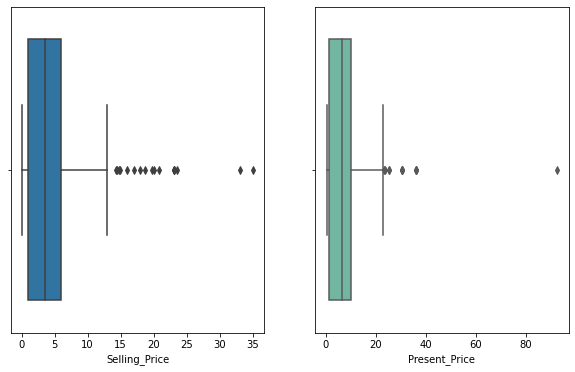

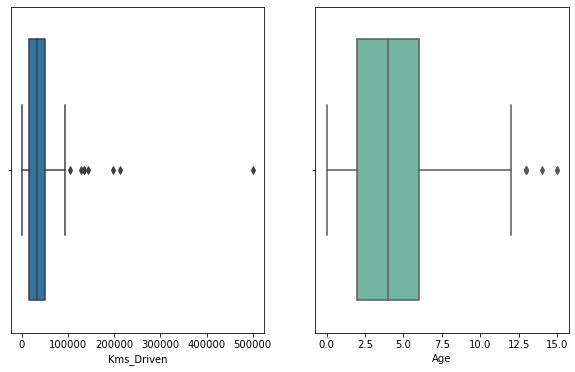

In [30]:
Numerical =['Selling_Price','Present_Price','Kms_Driven','Age']
i = 0
while i < 4 :
    plt.figure (figsize=(10,6))
    plt.subplot(121)
    sns.boxplot(data=df3, x = Numerical[i])
    i +=1
    plt.subplot(122)
    sns.boxplot(data = df3, x = Numerical[i], palette=sns.color_palette('Set2',2))
    i +=1
    plt.show()
    
    

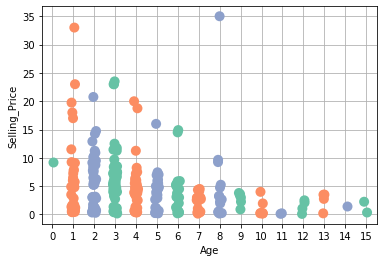

In [31]:
sns.stripplot(x=df3.Age, y = df3.Selling_Price, palette = sns.color_palette ('Set2',3), s=10)
plt.grid()
plt.show()

In [32]:
df3.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
Age,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


# the behaviour of Age is opposie of target (Selling_Price)

In [33]:
df3.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

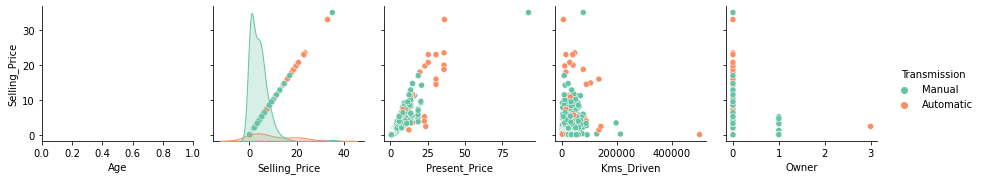

In [34]:
sns.pairplot(df3, y_vars = ["Selling_Price"], hue = "Transmission", palette = sns.color_palette("Set2", 2))
plt.show()



In [35]:
df3.Seller_Type.value_counts()


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

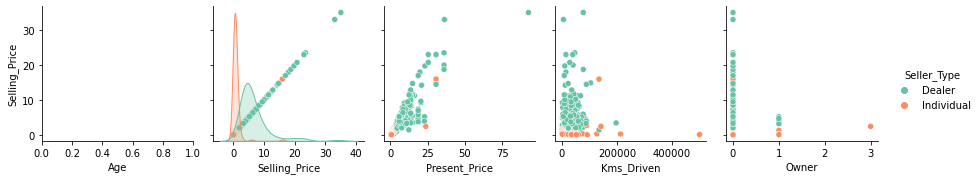

In [36]:
sns.pairplot(df3, y_vars = ['Selling_Price'], hue = 'Seller_Type', palette = sns.color_palette('Set2',2))
plt.show()

In [37]:
df3.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

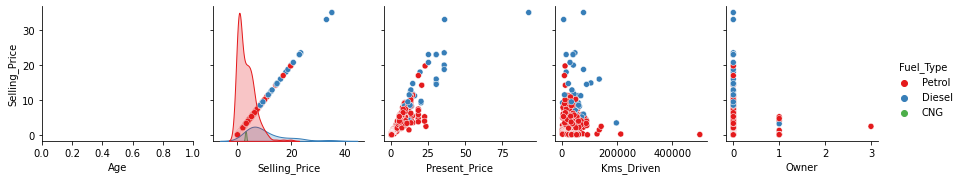

In [38]:
sns.pairplot (df3, y_vars = ['Selling_Price'], hue = 'Fuel_Type', palette= sns.color_palette('Set1',3))

In [39]:
df3.describe(include='object')

,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


In [40]:
df3.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
df3.isna().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

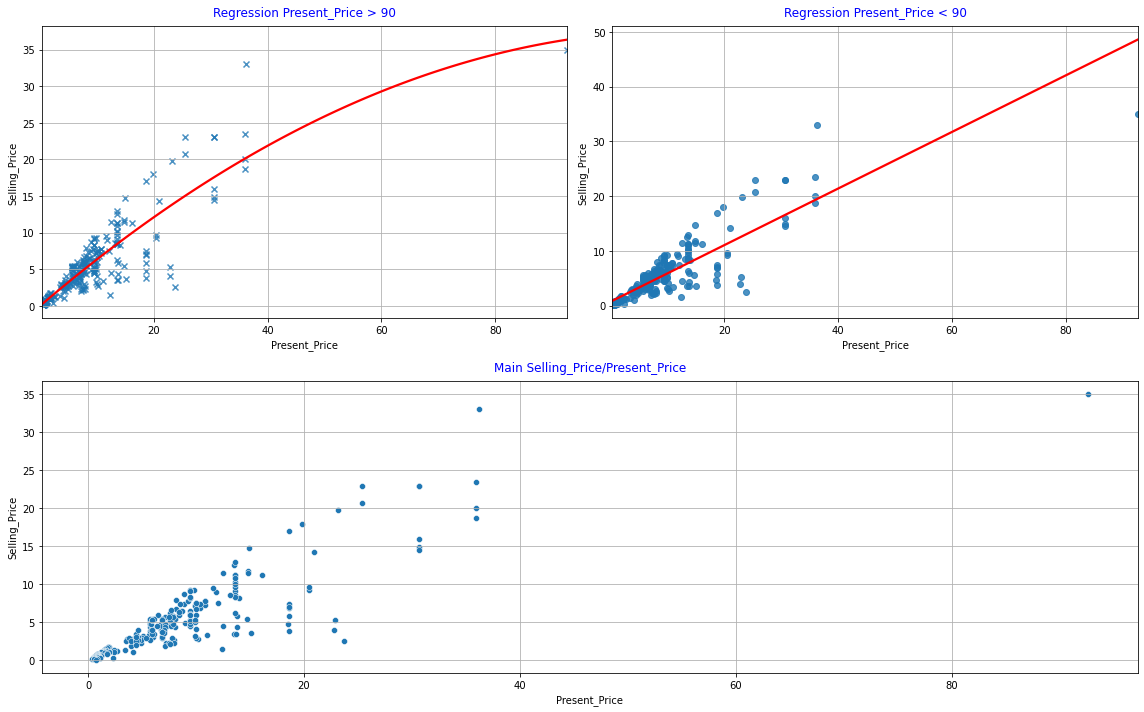

In [42]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.title('Regression Present_Price > 90', pad = 10, color = 'b')
sns.regplot (x = 'Present_Price', y ='Selling_Price', data =df3, ci =None, line_kws ={'color':'r'}, marker ='x', order=2)
plt.grid()

plt.subplot(222)
plt.title('Regression Present_Price < 90', pad = 10, color = 'b')
sns.regplot(data=df3, x = 'Present_Price', y = 'Selling_Price', ci = None, line_kws = {'color':'r'},)
plt.grid()

plt.subplot(212)
plt.title('Main Selling_Price/Present_Price', pad = 10, color = 'b')
sns.scatterplot(data=df3, x ='Present_Price', y ='Selling_Price')
plt.grid()
plt.tight_layout()
plt.show()


0 < Selling_Price < 35 , 0 < Present_Price < 50
drop data [86]

# 3. ReAnalysing

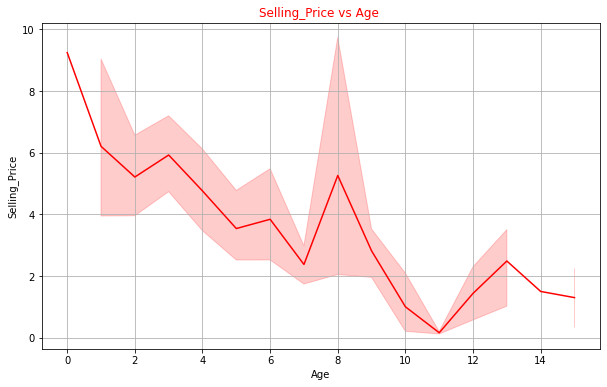

In [43]:
plt.figure(figsize = (10,6)) 
sns.lineplot(data = df3, x ='Age', y ='Selling_Price', color = 'r')
plt.title('Selling_Price vs Age ', color = 'r')
plt.grid()



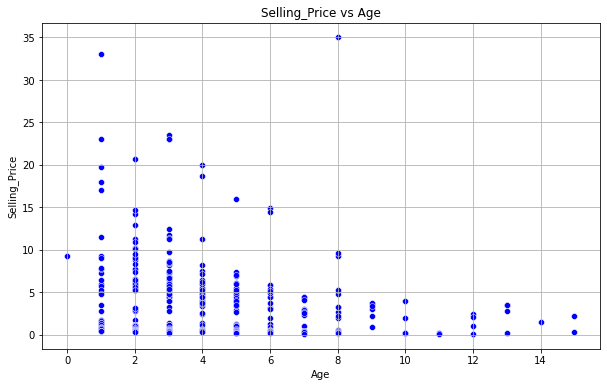

In [44]:
plt.figure(figsize = (10,6))
sns.scatterplot (data= df3, x ='Age', y ='Selling_Price', color = 'b')
plt.title ('Selling_Price vs Age')
plt.grid()

'Age' and 'Selling_Price' have reverse relationship
'Age' has a great impact on 'Selling_Price'

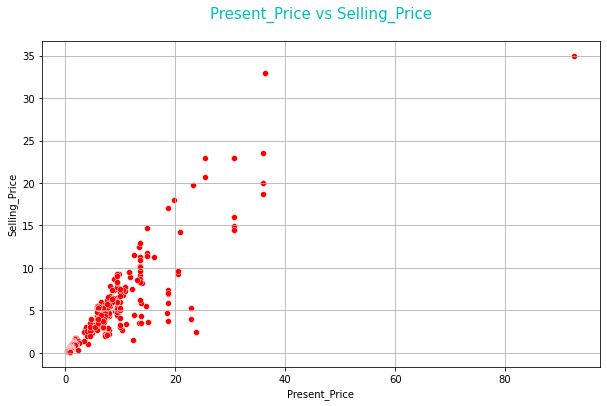

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df3, x ='Present_Price', y = 'Selling_Price', color ='r')
plt.title('Present_Price vs Selling_Price', color = 'c', size = 15, y=1.05)
plt.grid()

there is an increasing linear relationship 'Present_Price' & 'Selling_Price'

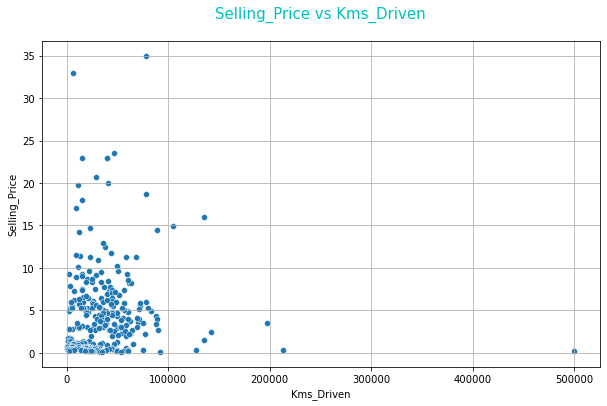

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df3, x ='Kms_Driven', y ='Selling_Price')
plt.title('Selling_Price vs Kms_Driven', color ='c', y = 1.05, size = 15)
plt.grid()

'Kms_Driven' and 'Selling_Price' have reverse relationship

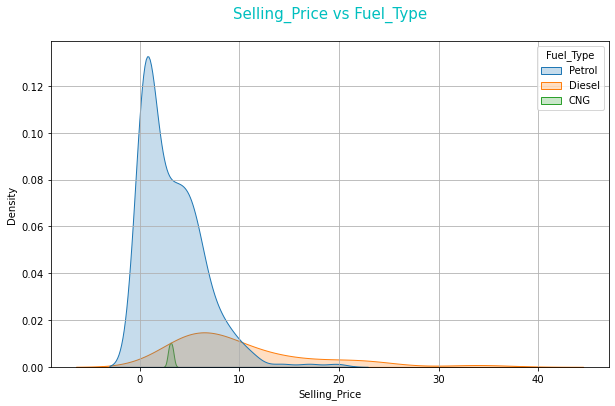

In [47]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = df3, x = 'Selling_Price', hue = 'Fuel_Type', fill = True)
plt.title ('Selling_Price vs Fuel_Type', color ='c', y=1.05, size = 15)
plt.grid()


 Diesel > Petrol > CNG

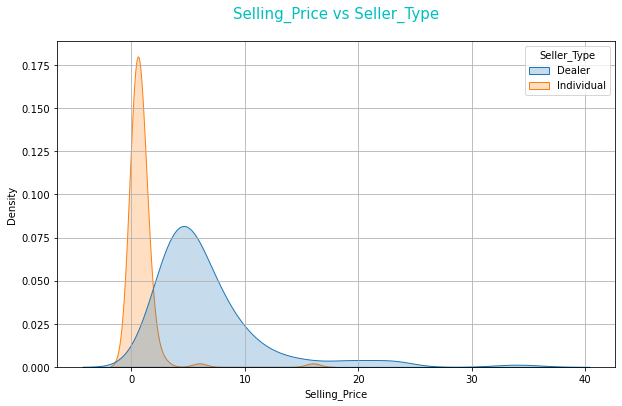

In [48]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df3, x = 'Selling_Price', hue = 'Seller_Type', fill = True)
plt.title('Selling_Price vs Seller_Type', color = 'c', size = 15, y = 1.05)
plt.grid()

 Dealer > Individual 

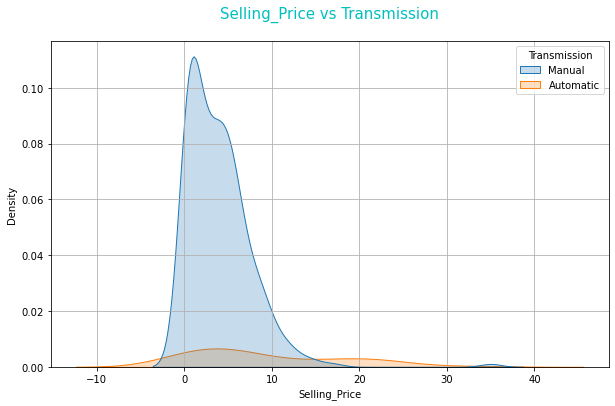

In [49]:
plt.figure(figsize=(10,6))
sns.kdeplot(data= df3, x ='Selling_Price', hue ='Transmission', fill= True)
plt.title('Selling_Price vs Transmission', color = 'c', size = 15, y=1.05)
plt.grid()

In [50]:
df3

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,3,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,9,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,1,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [51]:
###'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'###

In [52]:
print (pd.unique(df3['Fuel_Type']))
print(pd.unique(df3['Seller_Type']))
print(pd.unique(df3['Transmission']))
print(pd.unique(df3['Owner']))


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [53]:
df3

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,3,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,9,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,1,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [54]:
df3['Fuel_Type'].replace({'Diesel':2, 'Petrol':3, 'CNG':4}, inplace=True)
df3['Seller_Type'].replace({'Dealer':2, 'Individual':3}, inplace=True)
df3['Transmission'].replace({'Manual':2 ,'Automatic':3}, inplace=True)
df3


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,3,2,2,0
1,5,4.75,9.54,43000,2,2,2,0
2,1,7.25,9.85,6900,3,2,2,0
3,7,2.85,4.15,5200,3,2,2,0
4,4,4.60,6.87,42450,2,2,2,0
...,...,...,...,...,...,...,...,...
296,2,9.50,11.60,33988,2,2,2,0
297,3,4.00,5.90,60000,3,2,2,0
298,9,3.35,11.00,87934,3,2,2,0
299,1,11.50,12.50,9000,2,2,2,0


# Create Model

In [55]:
x = df3.drop('Selling_Price', axis =1)
y= df3.Selling_Price.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split (x, y, test_size = 0.2, random_state = 1)
Model= LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

In [56]:
from sklearn.model_selection import KFold

In [57]:
k_fold = KFold(10)
print(cross_val_score(Model, x, y.ravel(), cv = k_fold, n_jobs =1))

[ 7.57983362e-01  8.92805633e-01  7.35996778e-01  8.66543499e-01
 -4.21390694e+01 -1.07342060e+03 -3.68366115e-01  7.71108946e-01
  8.27016304e-01  8.71469979e-01]


In [58]:
df3

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,3,2,2,0
1,5,4.75,9.54,43000,2,2,2,0
2,1,7.25,9.85,6900,3,2,2,0
3,7,2.85,4.15,5200,3,2,2,0
4,4,4.60,6.87,42450,2,2,2,0
...,...,...,...,...,...,...,...,...
296,2,9.50,11.60,33988,2,2,2,0
297,3,4.00,5.90,60000,3,2,2,0
298,9,3.35,11.00,87934,3,2,2,0
299,1,11.50,12.50,9000,2,2,2,0


In [59]:
len(df3)/10

30.1

remove mistake fold

In [60]:
data1= df3[df3.index < 120]
data2= df3[df3.index > 210]
df4 = data1.append(data2)
df4.reset_index(drop = True, inplace= True)
df4

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,3.35,5.59,27000,3,2,2,0
1,5,4.75,9.54,43000,2,2,2,0
2,1,7.25,9.85,6900,3,2,2,0
3,7,2.85,4.15,5200,3,2,2,0
4,4,4.60,6.87,42450,2,2,2,0
...,...,...,...,...,...,...,...,...
205,2,9.50,11.60,33988,2,2,2,0
206,3,4.00,5.90,60000,3,2,2,0
207,9,3.35,11.00,87934,3,2,2,0
208,1,11.50,12.50,9000,2,2,2,0


In [61]:
#x = df4.drop('Selling_Price', axis =1)
x = pd.DataFrame (data= df4, columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Age'])
y= df4.Selling_Price.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split (x, y, test_size = 0.2, random_state = 1)
Model= LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred = Model.predict(x_test)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt( metrics.mean_squared_error(y_test,y_pred)))
print('R2score:', metrics.r2_score(y_test,y_pred))

MAE: 1.0954785302346284
MSE: 1.6822995671727101
RMSE: 1.2970349136290473
R2score: 0.9226434284884937


In [64]:
print('Model Intercept=', Model.intercept_)
print('ModelCoefs=', Model.coef_)

Model Intercept= [9.13718807]
ModelCoefs= [[ 4.42320455e-01 -2.66901271e-05 -2.25919515e+00 -1.26225774e+00
   2.10515821e+00 -1.13003710e+00 -4.62552614e-01]]


In [65]:
y_pred = Model.predict([[11.23,42000,1,3,2,2,10]])
y_pred

array([[4.26220917]])

# check_out noises

In [66]:
print(pd.unique(df4['Fuel_Type']))
print(pd.unique(df4['Seller_Type']))
print(pd.unique(df4['Transmission']))
print(pd.unique(df4['Owner']))


[3 2 4]
[2 3]
[2 3]
[0 1 3]


In [85]:
x.columns

Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age'],
      dtype='object')

there is not any noise here

In [90]:
k_fold = KFold(n_splits=5)
results = (cross_val_score(Model, x, y.ravel(), cv = k_fold, n_jobs = -1))
print(results)
print(np.mean(results))


[0.03890985 0.83812431 0.64461109 0.73045459 0.90904384]
0.6322287365127236


# trying to make nonlinear features 

# dimension = x^2

In [84]:
# making fuction
def check (dimension,testsize):
    r2=0.90
    for column in x.columns:
        new_col_name = column + str(dimension)
        new_col_value = x[column]**(dimension)
        x.insert(0, new_col_name, new_col_value)
        x_train,x_test,y_train,y_test = train_test_split (x, y, test_size=testsize, random_state=0)
        New_Model = LinearRegression()
        New_Model.fit(x_train,y_train)
        y_pred= New_Model.predict(x_test)
        r2_new =metrics.r2_score(y_test,y_pred)
        if r2_new < r2:
            x.drop([new_col_name], axis =1, inplace = True)
        else:
            r2 = r2_new
    print('r2score:',r2)
    
check(2,0.2)





r2score: 0.9


In [76]:
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,3,2,2,0,4
1,9.54,43000,2,2,2,0,5
2,9.85,6900,3,2,2,0,1
3,4.15,5200,3,2,2,0,7
4,6.87,42450,2,2,2,0,4
...,...,...,...,...,...,...,...
205,11.60,33988,2,2,2,0,2
206,5.90,60000,3,2,2,0,3
207,11.00,87934,3,2,2,0,9
208,12.50,9000,2,2,2,0,1
